In [1]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import scipy
from scipy import ndimage

#import cv2
import pims
from PIL import Image

import skimage

import json


import pylattice

import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc


import sys
sys.path.append("/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/functions/")
#import pylattice.functions.InterfaceChimeraX as icx
import InterfaceChimeraX as icx
import TiffProcessing as tiffproc

In [2]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'


filepath = path+'_inputParameters.csv'
print(filepath)
inputParameters = pd.read_csv(filepath,names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")


slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/_inputParameters.csv


In [3]:
filepath = path +outputDataFolder+'/'+trackingCsvFilename
print(filepath)
data = pd.read_csv(filepath,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]

dataUnique = data.drop_duplicates(subset='trackId')

longTracks = data[data['tracklength'] > 5]
longTracks

print("total number of tracks: {}\nunique tracks: {}\nlongtracks (len>5) {}".format(len(data),len(dataUnique),len(longTracks.drop_duplicates(subset='trackId'))))

/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/trackedFeatures.csv
total number of tracks: 1728
unique tracks: 484
longtracks (len>5) 94


In [4]:
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,10,1,2,8.867713e+01,9.122092e+01,3.158334e+00,3.028255e+04,5.641533e-02,5.641886e-02,5.648338e-02,1.226109e+03
1,1,10,2,2,8.814729e+01,9.108662e+01,2.907351e+00,3.215766e+04,5.548106e-02,5.548287e-02,5.566619e-02,1.279000e+03
2,1,10,3,2,8.800186e+01,9.121060e+01,2.750530e+00,3.394095e+04,5.373694e-02,5.373181e-02,5.406101e-02,1.305840e+03
3,1,10,4,1,8.747528e+01,9.120650e+01,2.896948e+00,2.882830e+04,6.140007e-02,6.140340e-02,6.161932e-02,1.268522e+03
4,1,10,5,2,8.693592e+01,9.061444e+01,3.005414e+00,3.815347e+04,5.647618e-02,5.646657e-02,5.660023e-02,1.545233e+03


In [5]:
dataUnique[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,10,1,2,8.867713e+01,9.122092e+01,3.158334e+00,3.028255e+04,5.641533e-02,5.641886e-02,5.648338e-02,1.226109e+03
10,2,10,1,10,8.392389e+01,7.829316e+01,8.963703e+00,1.621301e+04,7.334730e-02,7.333731e-02,7.334814e-02,8.402855e+02
20,3,10,1,12,8.152383e+01,8.918384e+01,1.155192e+01,1.250052e+04,7.601076e-02,7.601617e-02,7.601801e-02,6.706973e+02
30,4,10,1,17,5.986329e+01,2.825515e+01,1.730586e+01,4.219047e+04,6.444381e-02,6.443854e-02,6.443656e-02,1.919928e+03
50,5,10,1,15,7.582389e+01,8.896200e+01,1.516161e+01,2.111668e+04,6.297465e-02,6.297889e-02,6.297527e-02,9.391788e+02


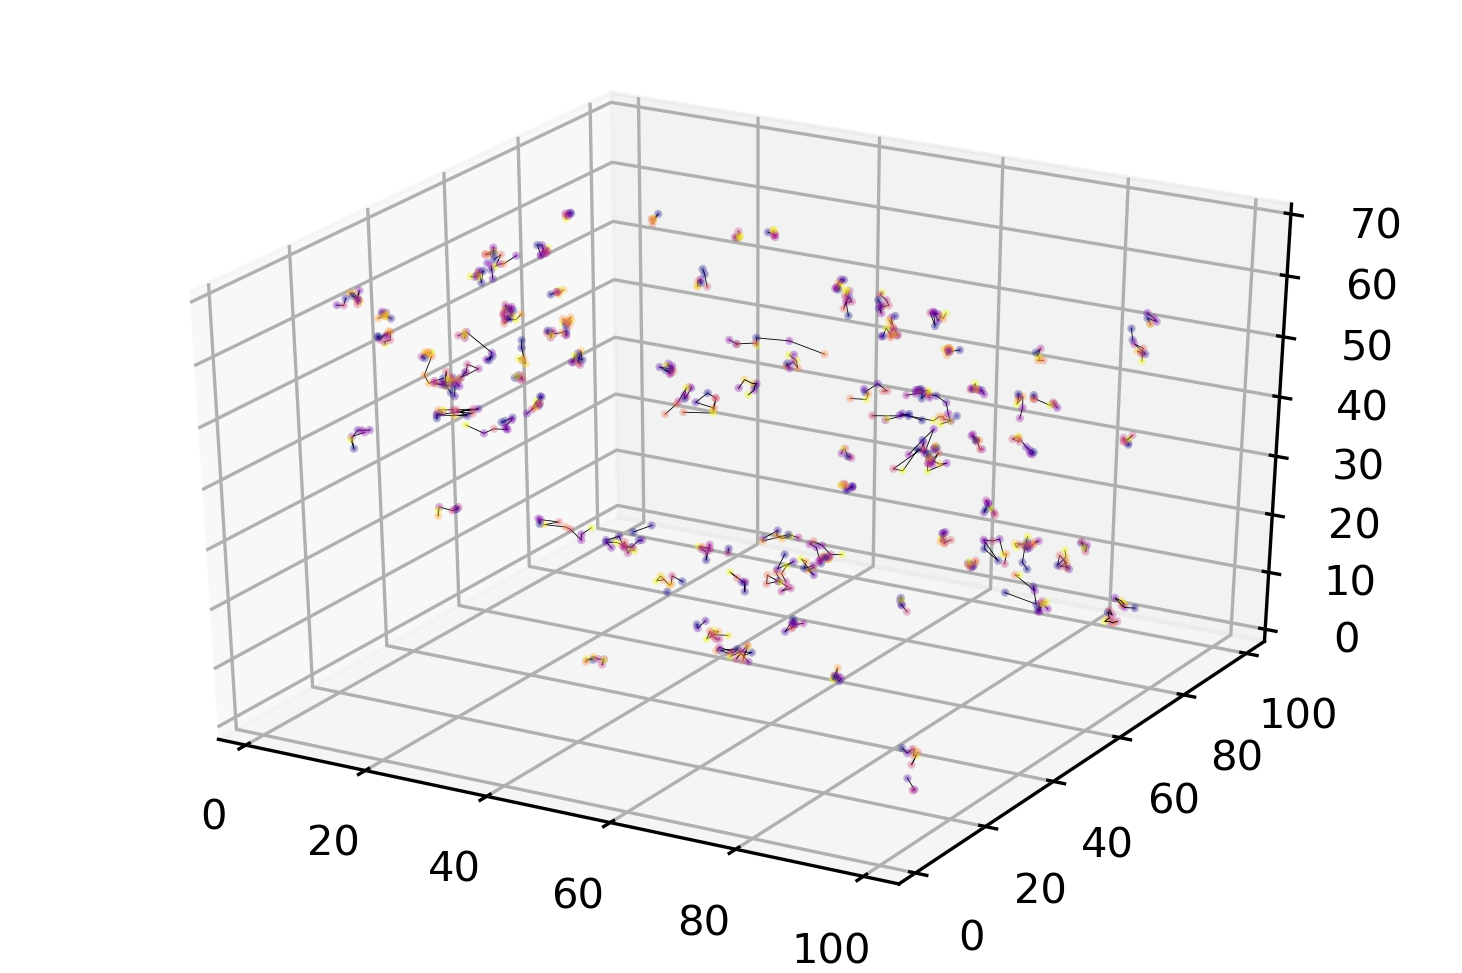

In [6]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)


ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = longTracks[longTracks['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);

# Track Length Distribution

Text(0,0.5,'frequency')

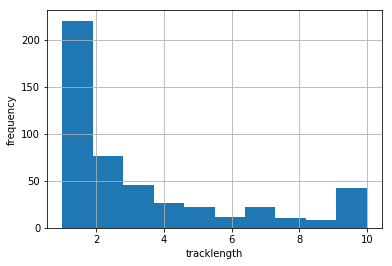

In [7]:
(dataUnique[['trackId','tracklength']].drop_duplicates())['tracklength'].hist()
plt.xlabel('tracklength')
plt.ylabel('frequency')


# Track Intensity Evolution

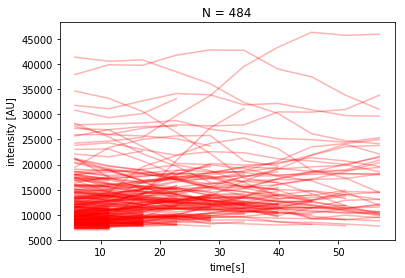

In [8]:


#uniqueLongTracks = dataUnique[dataUnique['tracklength'] > 10]
tracksBeingTested = dataUnique['trackId'].values[0:2000]

N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:

    track = data[data['trackId'] == trackID]
    #print((track['tracklength'].values)[0])
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    a = track['A'].values.astype(float)
    

    plt.plot(time_inSeconds,scipy.ndimage.filters.uniform_filter(a,size =5),c='r',alpha=0.3)
    plt.xlabel('time[s]')
    plt.ylabel('intensity [AU]')
    plt.title('N = '+str(N))


#plt.ylim(0,20000)

# distances within a track

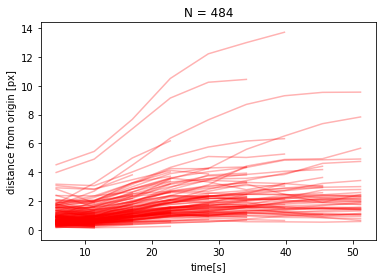

In [9]:


tracksBeingTested = dataUnique['trackId'].values[0:2000]

N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:

    track = data[data['trackId'] == trackID]
    #print((track['tracklength'].values)[0])
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    a = track['A'].values.astype(float)
    
    distances = []
    distToOrigin = []
    origin = np.array([x[0],y[0],z[0]])
    for i in range(1,len(x)):
        a = np.array([x[i-1],y[i-1],z[i-1]])
        b = np.array([x[i],y[i],z[i]])
        dist = np.linalg.norm(a-b)
        dist2ori = np.linalg.norm(origin-a)
        distances.append(dist)
        distToOrigin.append(dist2ori)
    

    plt.plot(time_inSeconds[0:-1],scipy.ndimage.filters.uniform_filter(distToOrigin,size =5),c='r',alpha=0.3)
    plt.xlabel('time[s]')
    plt.ylabel('distance from origin [px]')
    plt.title('N = '+str(N))


#plt.ylim(0,20000)

# Crude Multitrack Alignment

In [10]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
#print('accumulatorLenght',accumulatorLenght)

accumulator = [[] for _ in range(accumulatorLenght)]
mean = [0] * accumulatorLenght
stddev = [0] * accumulatorLenght

alignmentIndexes = []
#accumulator_dnm = [[] for _ in range(accumulatorLenght)]
#mean_dnm = [0] * accumulatorLenght
#stddev_dnm = [0] * accumulatorLenght

tracksBeingTested = dataUnique['trackId']#.values[0:20]
N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:
    
    if(iteration%100 == 0):
            print(iteration)

    track = data[data['trackId'] == trackID]
    
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    amplitudesArray = track['A'].astype(float).values
    #print(amplitudesArray)
    amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
    
    
    maxAmplitude_idx = amplitudesArray_filtered.argmax()

    maxTime = time_inSeconds[maxAmplitude_idx]
    maxAmplitude = amplitudesArray[maxAmplitude_idx]

    

    

    # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
    #plt.plot(time_inSeconds,amplitudesArray)
    #plt.plot(time_inSeconds,amplitudesArray_filtered)
    #plt.show()

    
    alignmentIndexes.append(maxAmplitude_idx)
    
    for j in range(0,tracklength-1):
        
        time = time_inSeconds[j]
        #amplitude = amplitudesArray[j]
        amplitude = amplitudesArray_filtered[j]
        

        #SWITCH HERE
        #alignmentIndex = newZeroIndex-maxAmplitude_idx+j
        alignmentIndex = newZeroIndex+j
        
        accumulator[alignmentIndex].append(amplitude)
        
 

    iteration = iteration+1     
            
# weighting:
for i in range(0,len(accumulator)):
    mean[i] = np.nanmean(accumulator[i])
    stddev[i] = np.nanstd(accumulator[i])


print("done")
    


0
100
200
300
400
done


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


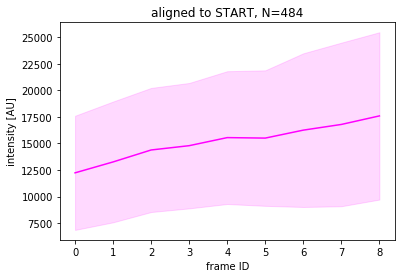

In [11]:
color = 'magenta'
time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
#plt.plot(mean,c='green')
plt.plot(time_inSeconds,mean,c=color)
plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.xlabel('time[s]')
plt.xlabel('frame ID')
plt.ylabel('intensity [AU]')

#plt.xlim(min(time_inSeconds),max(time_inSeconds))
#plt.ylim(5000,40000)
plt.title('aligned to START, N='+str(N))
#plt.title('aligned to MOVIE START, N='+str(N))

plt.show()

# Align individual length cohorts

0


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


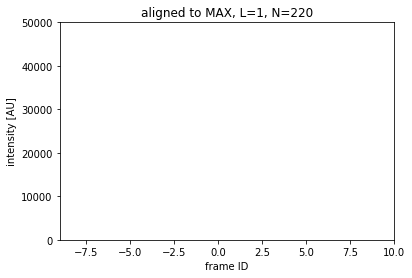

0


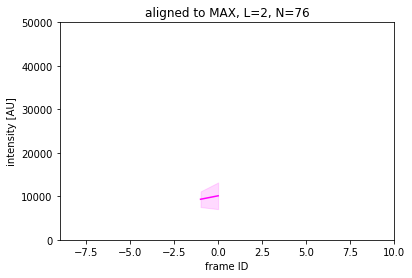

0


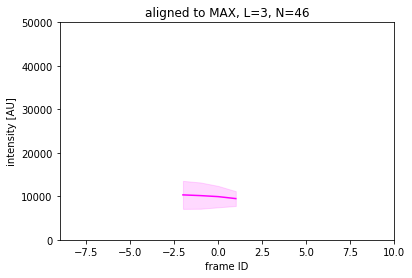

0


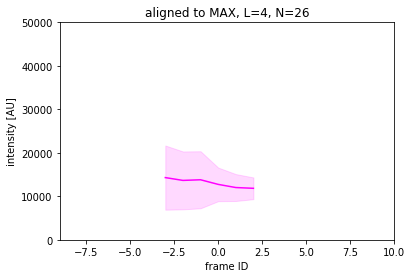

0


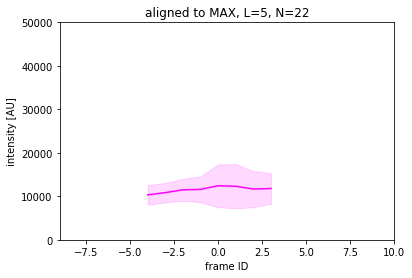

0


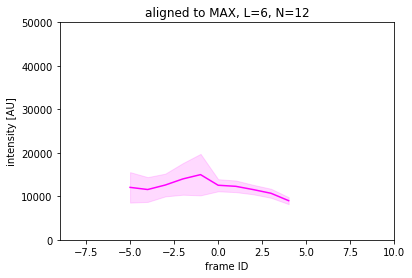

0


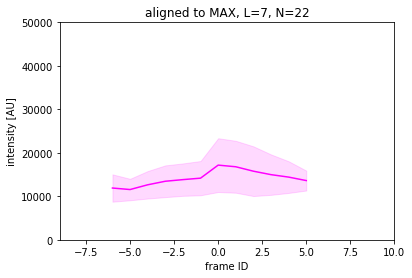

0


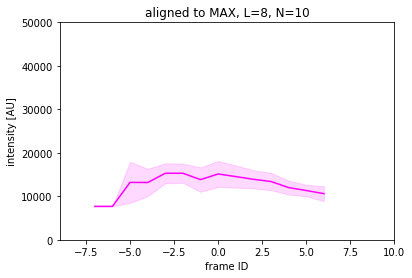

0


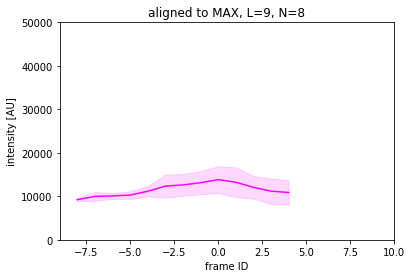

0


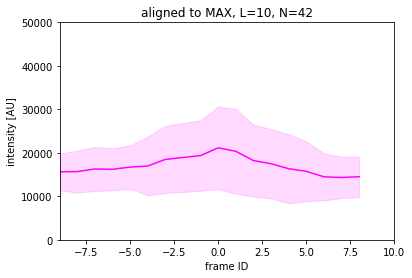

In [14]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
#print('accumulatorLenght',accumulatorLenght)


uniqueLengths = set(dataUnique['tracklength'].values)

for trackLength in uniqueLengths:
    
    trackLengthSelectedTracks =  dataUnique[dataUnique['tracklength']==trackLength]
    tracksBeingTested = trackLengthSelectedTracks['trackId'].values#[0:5000]
    N = len(tracksBeingTested)
    iteration = 0
    
    accumulator = [[] for _ in range(accumulatorLenght)]
    mean = [0] * accumulatorLenght
    stddev = [0] * accumulatorLenght
    
    alignmentIndexes = []
    #accumulator_dnm = [[] for _ in range(accumulatorLenght)]
    #mean_dnm = [0] * accumulatorLenght
    #stddev_dnm = [0] * accumulatorLenght
    
    for trackID in tracksBeingTested:
        
        if(iteration%1000 == 0):
                print(iteration)
    
        track = data[data['trackId'] == trackID]
        
        tracklength = (track['tracklength'].values)[0]
        track = track[0:tracklength]
        
        time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
        
        amplitudesArray = track['A'].astype(float).values
        #print(amplitudesArray)
        amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
        
        
        maxAmplitude_idx = amplitudesArray_filtered.argmax()
    
        maxTime = time_inSeconds[maxAmplitude_idx]
        maxAmplitude = amplitudesArray[maxAmplitude_idx]
    
        
    
        
    
        # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
        #plt.plot(time_inSeconds,amplitudesArray)
        #plt.plot(time_inSeconds,amplitudesArray_filtered)
        #plt.show()
    
        
        alignmentIndexes.append(maxAmplitude_idx)
        
        for j in range(0,tracklength-1):
            
            time = time_inSeconds[j]
            #amplitude = amplitudesArray[j]
            amplitude = amplitudesArray_filtered[j]
    
            #SWITCH HERE
            alignmentIndex = newZeroIndex-maxAmplitude_idx+j
            #alignmentIndex = newZeroIndex+j
            
            accumulator[alignmentIndex].append(amplitude)
            
     
    
        iteration = iteration+1     
            
    # weighting:
    for i in range(0,len(accumulator)):
        mean[i] = np.nanmean(accumulator[i])
        stddev[i] = np.nanstd(accumulator[i])
    
    
        
    time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
    #plt.plot(mean,c='green')
    plt.plot(time_inSeconds,mean,c='magenta')
    plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
    #plt.xlabel('time[s]')
    plt.xlabel('frame ID')
    plt.ylabel('intensity [AU]')
    
    plt.xlim(min(time_inSeconds),max(time_inSeconds))
    #plt.xlim(0,70)
    plt.ylim(0,50000)
    plt.title('aligned to MAX, L='+str(trackLength)+', N='+str(N))
    #plt.title('aligned to MOVIE START, N='+str(N))
    #plt.savefig('488_L'+str(trackLength)+'.png')
    plt.show()
